<a href="https://colab.research.google.com/github/Willlee0225/nbviewer/blob/master/CNN_%E4%BD%9C%E6%A5%AD2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

%tensorflow_version 2.x

In [0]:
import tensorflow as tf

##1. 讀入 Fashion MNSIT 數據集


In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


##2. 欣賞數據集內容

In [5]:
len(x_train)

60000

In [6]:
len(x_test)

10000

##觀察資料
### 有十個類別

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
n=2000
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         53,  70,  30,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  83, 223, 220,
        231, 233, 231, 218, 191,  33,   0,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 142, 248, 228, 215,
        217, 219, 219, 220, 235, 234, 107,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   3,   0,  69, 245, 221, 229, 213,
        219, 206, 210, 217, 222, 218, 243,  64,   0,   4,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 231, 224, 230, 222,
        217, 222, 224, 215, 215, 222, 219,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   0,   0, 193, 238, 216, 222, 218, 213,
        211, 208, 210, 217, 224, 217, 222, 169,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [9]:
y_train[n]

4

##將顏色稍微改變了一下

這是 Coat


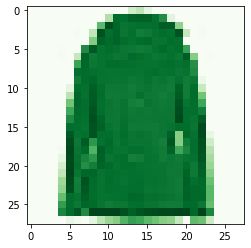

In [10]:
n = 2000
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greens');

##看一下每個種類長怎樣

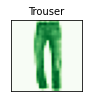

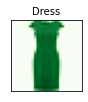

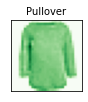

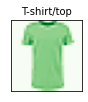

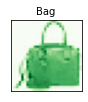

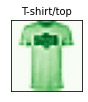

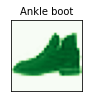

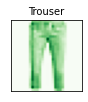

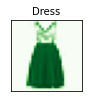

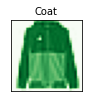

In [11]:
pick = np.random.choice(60000, 10, replace=False)

for i in range(10):
    n = pick[i]
    a = plt.figure(figsize=(15,15))
    ax = a.add_subplot(1,10,i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greens')

##3. 資料整理
###先將資料標準化

In [0]:
x_train = x_train.reshape(60000, 28, 28, 1) / 255 #告知我們只有1個channel

In [0]:
x_test = x_test.reshape(10000, 28, 28, 1) / 255

###將y改成one hot encoding，因為有十種，所以輸出十種

In [14]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_train[2000]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

##4.打造CNN神經網路

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten 
from tensorflow.keras.optimizers import SGD

##組裝一台空白學習機

In [0]:
model = Sequential()

###取2倍數的filter數量

In [0]:
model.add(Conv2D(32, (3,3), padding='same',
                input_shape=(28,28,1),
                activation='relu'))

In [0]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
model.add(Conv2D(64, (3,3), padding='same',
                activation='relu'))

In [0]:
model.add(MaxPooling2D(pool_size = (2, 2)))

In [0]:
model.add(Conv2D(128, (3,3), padding='same',
                activation='relu'))

In [0]:
model.add(MaxPooling2D(pool_size = (2, 2)))

###拉平

In [0]:
model.add(Flatten())

###這邊改變了神經元的數量改為200,100,總共2層，激發函數依然選用relu

In [0]:
model.add(Dense(200, activation = "relu"))

In [0]:
model.add(Dense(100, activation = "relu"))

In [0]:
model.add(Dense(10, activation='softmax'))

###檢視神經網路

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

In [28]:
(3*3+1)*32 #驗證summary中第一層所需要調整的參數

320

###組裝神經網路
###這邊我改變了learning rate改為0.099

In [0]:
model.compile(loss='mse', optimizer=SGD(lr=0.099),
             metrics=['accuracy'])

###訓練
一個epoch要跑（訓練樣本數/Batch_Size）個Iterations
###這裡改變了batch_size,每做100題就檢查一次,epochs改成做20次

In [30]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
600/600 [==============================] - 89s 148ms/step - loss: 0.0897 - accuracy: 0.2996
Epoch 2/20
600/600 [==============================] - 88s 147ms/step - loss: 0.0880 - accuracy: 0.4092
Epoch 3/20
600/600 [==============================] - 89s 148ms/step - loss: 0.0612 - accuracy: 0.5637
Epoch 4/20
600/600 [==============================] - 89s 148ms/step - loss: 0.0399 - accuracy: 0.7099
Epoch 5/20
600/600 [==============================] - 89s 149ms/step - loss: 0.0347 - accuracy: 0.7509
Epoch 6/20
600/600 [==============================] - 94s 157ms/step - loss: 0.0315 - accuracy: 0.7771
Epoch 7/20
600/600 [==============================] - 90s 150ms/step - loss: 0.0294 - accuracy: 0.7942
Epoch 8/20
600/600 [==============================] - 89s 149ms/step - loss: 0.0277 - accuracy: 0.8071
Epoch 9/20
600/600 [==============================] - 89s 148ms/step - loss: 0.0263 - accuracy: 0.8167
Epoch 10/20
600/600 [==============================] - 89s 148ms/step - l

###預測

In [31]:
result = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [0]:
def CNNmodel_predict(n):
    print("神經網路CNN的預測是：", class_names[result[n]])
    X = x_test[n].reshape(28, 28)
    plt.imshow(X, cmap = "Reds")

神經網路CNN的預測是： Coat


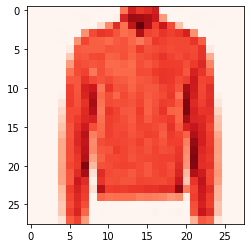

In [33]:
CNNmodel_predict(1784)

In [0]:
from ipywidgets import interact_manual

In [35]:
interact_manual(CNNmodel_predict, n=(0, 9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.CNNmodel_predict>

###檢查是否有違背答案的傾向





In [37]:
score = model.evaluate(x_test, y_test)
loss, acc = score
print('測試資料的正確率為', acc)

313/313 [==============================] - 5s 15ms/step - loss: 0.0205 - accuracy: 0.8603
測試資料的正確率為 0.8603000044822693


##組裝第二台函數學習機
###神經元數量，層數接改變，batch size 一樣100題檢查一次

In [0]:
model2 = Sequential()

In [0]:
model2.add(Conv2D(32, (3,3), padding='same',
                input_shape=(28,28,1),
                activation='relu'))

In [0]:
model2.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
model2.add(Conv2D(64, (3,3), padding='same',
                input_shape=(28,28,1),
                activation='relu'))

In [0]:
model2.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
model2.add(Conv2D(128, (3,3), padding='same',
                input_shape=(28,28,1),
                activation='relu'))

In [0]:
model2.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
model2.add(Flatten())

In [0]:
model2.add(Dense(200, activation = "relu"))

In [0]:
model2.add(Dense(100, activation = "relu"))

In [0]:
model2.add(Dense(100, activation = "relu"))

In [0]:
model2.add(Dense(10, activation='softmax'))

###這邊改變了神經元的數量改為200,100,100,總共3層，激發函數依然選用relu

In [0]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1152)             

In [0]:
model2.compile(loss='mse', optimizer=SGD(lr=0.099),
             metrics=['accuracy'])

###根據前一次經驗，epochs超過10次之後，增幅有限，故這次epochs改成10次。

In [0]:
model2.fit(x_train, y_train, batch_size=100, epochs=10)

Epoch 1/10
600/600 [==============================] - 90s 149ms/step - loss: 0.0889 - accuracy: 0.2271
Epoch 2/10
600/600 [==============================] - 89s 148ms/step - loss: 0.0668 - accuracy: 0.4985
Epoch 3/10
600/600 [==============================] - 90s 149ms/step - loss: 0.0424 - accuracy: 0.6852
Epoch 4/10
600/600 [==============================] - 90s 149ms/step - loss: 0.0370 - accuracy: 0.7304
Epoch 5/10
600/600 [==============================] - 90s 149ms/step - loss: 0.0338 - accuracy: 0.7592
Epoch 6/10
600/600 [==============================] - 89s 149ms/step - loss: 0.0314 - accuracy: 0.7794
Epoch 7/10
600/600 [==============================] - 90s 149ms/step - loss: 0.0297 - accuracy: 0.7912
Epoch 8/10
600/600 [==============================] - 90s 149ms/step - loss: 0.0282 - accuracy: 0.8037
Epoch 9/10
600/600 [==============================] - 90s 149ms/step - loss: 0.0270 - accuracy: 0.8108
Epoch 10/10
600/600 [==============================] - 90s 150ms/step - l

###預測

In [0]:
result = model2.predict_classes(x_test)

In [0]:
def CNNmodel2_predict(n):
    print("神經網路CNN的預測是：", class_names[result[n]])
    X = x_test[n].reshape(28, 28)
    plt.imshow(X, cmap = "Blues")

神經網路CNN的預測是： Coat


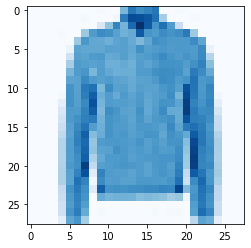

In [0]:
CNNmodel2_predict(1784)

In [0]:
from ipywidgets import interact_manual

In [0]:
interact_manual(CNNmodel_predict, n=(0, 9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.CNNmodel_predict>

###檢查是否有違背答案的傾向

In [0]:
score = model2.evaluate(x_test, y_test)
loss, acc = score
print('測試資料的正確率為', acc)

313/313 [==============================] - 5s 16ms/step - loss: 0.0257 - accuracy: 0.8222
測試資料的正確率為 0.8222000002861023


##總結
###本次作業在神經元個數，層數，都有做更改
###可以發現，神經元個數跟層數增加，正確率其實沒有顯著增加